<a href="https://colab.research.google.com/github/sudehashrafi/Does-the-customer-finalize-their-purchase-/blob/main/marshal_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

!pip install pandas_profiling==3.1.0
from pandas_profiling import ProfileReport

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 8.4 MB/s 
     |████████████████████████████████| 303 kB 55.6 MB/s 
     |████████████████████████████████| 596 kB 45.9 MB/s 
     |████████████████████████████████| 3.1 MB 53.2 MB/s 
     |████████████████████████████████| 690 kB 50.8 MB/s 
     |████████████████████████████████| 102 kB 14.5 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 48.9 MB/s 
     |████████████████████████████████| 38.1 MB 285 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=60b978d6367fb3278e2633b802f78744965390343027cf87e92175bec97419a0
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=d5ccfcc0b8f16c8e119999296a

#loading dataset

In [ ]:
dataset = pd.read_csv('dataset.csv')

#using describe method to obtain a general intuition 

In [ ]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
dataset.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
feature_names = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']

target = dataset['Revenue']

df = pd.DataFrame(dataset , columns = feature_names)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True


#exploratory data analysis (EDA)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/model/correlations.py:61: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'Data must be 1-dimensional')
  (include the error message: '{error}')"""
/usr/local/lib/python3.7/dist-packages/pandas_profiling/model/correlations.py:61: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The truth value of a 

KeyboardInterrupt: ignored

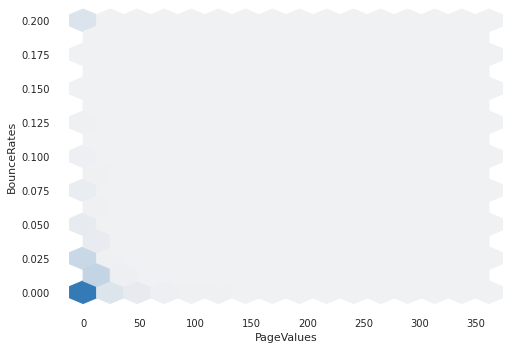

In [ ]:
profile=ProfileReport(df)
profile.to_file('dataset.html')

#feature engineering for missing values

In [ ]:
#baraye har sotun tedad null hara bedast miavarim
df.isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
dtype: int64

seperating categorical and numerical features

In [ ]:
categorical_col = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend','Month']

numerical_col = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

filling missing values of numerical features

In [ ]:
df.Administrative.fillna(df.Administrative.mean() , inplace = True)
df.Administrative_Duration.fillna(df.Administrative_Duration.mean() , inplace = True)

df.Informational.fillna(df.Informational.mean() , inplace = True)
df.Informational_Duration.fillna(df.Informational_Duration.mean() , inplace = True)

df.ProductRelated.fillna(df.ProductRelated.mean() , inplace = True)
df.ProductRelated_Duration.fillna(df.ProductRelated_Duration.mean() , inplace = True)

df.BounceRates.fillna(df.BounceRates.mean() , inplace = True)
df.ExitRates.fillna(df.ExitRates.mean() , inplace = True)
df.PageValues.fillna(df.PageValues.mean() , inplace = True)
df.SpecialDay.fillna(df.SpecialDay.mean() , inplace = True)

filling missing values of categorical features

In [ ]:
df.OperatingSystems.value_counts()
df.OperatingSystems.fillna('2.0' , inplace = True)

df.Browser.value_counts()
df.Browser.fillna('2.0' , inplace = True)

df.Region.value_counts()
df.Region.fillna('1.0' , inplace = True)

df.TrafficType.value_counts()
df.TrafficType.fillna('2.0' , inplace = True)

df.VisitorType.value_counts()
df.VisitorType.fillna('Returning_Visitor' , inplace = True)

df.Weekend.value_counts()
df.Weekend.fillna('False', inplace = True)

df.Month.value_counts()
df.Month.fillna('May', inplace = True)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False
2,0.0,0.000000,0.0,0.0,1.0,0.000000,0.022231,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False
4,0.0,80.741179,0.0,0.0,10.0,627.500000,0.020000,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True


#converting categorical features to numerical features

In [ ]:
categorical = ['VisitorType','Weekend','Month']
for i in categorical:
  df = pd.get_dummies(df , columns=[i])

df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'Weekend_False', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')

In [ ]:
df['Revenue'] = target

#checking to see we have no more null value
df.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
VisitorType_New_Visitor          0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Weekend_False                    0
Weekend_True                     0
Weekend_False                    0
Month_Aug                        0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct           

In [ ]:
# df['revenue'] = pd.get_dummies(df['Revenue'], drop_first=True)
# df.drop('Revenue', axis=1, inplace=True)

# df = pd.get_dummies(df , columns = ['Revenue'])

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Revenue
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,False
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,False
2,0.0,0.000000,0.0,0.0,1.0,0.000000,0.022231,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,False
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.14,0.0,0.0,...,0,1,0,0,0,0,0,0,0,False
4,0.0,80.741179,0.0,0.0,10.0,627.500000,0.020000,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,False


#rasme toziE dataset e amuzeshi dar tamame vizhegi ha bar asase barchasb

In [ ]:
df.dtypes

Administrative                   float64
Administrative_Duration          float64
Informational                    float64
Informational_Duration           float64
ProductRelated                   float64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                  object
Browser                           object
Region                            object
TrafficType                       object
VisitorType_New_Visitor            uint8
VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
Weekend_False                      uint8
Weekend_True                       uint8
Weekend_False                      uint8
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June      

In [ ]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.PairGrid(df , hue='Revenue')

import matplotlib.pyplot as plt
plt.show()

ValueError: ignored

#correlation matrix

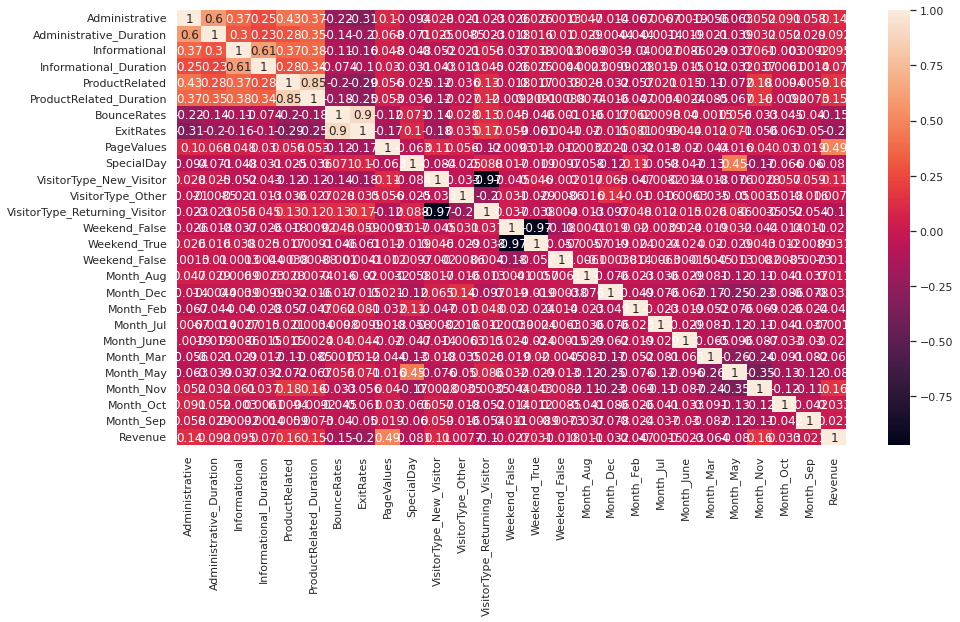

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True)

#Traing

In [ ]:
#i'm going to do 10 different splits
kfold_validation = KFold(10)

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.000000,0.0,0.0,1.0,0.000000,0.022231,0.200000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,80.741179,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.000000,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,1,0,0,0,0,0,0,0,0
12326,0.0,0.000000,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
12327,0.0,0.000000,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
12328,4.0,75.000000,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Y = df.iloc[:,30:]

In [ ]:
Y

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.20)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test,Y_test)

0.8657745336577454

#SVM

In [ ]:
from sklearn import svm 

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[2096    0]
 [ 361    9]]
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2096
        True       1.00      0.02      0.05       370

    accuracy                           0.85      2466
   macro avg       0.93      0.51      0.48      2466
weighted avg       0.88      0.85      0.79      2466



In [ ]:
percentage = clf.score(X_test, Y_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# res = confusion_matrix(Y_test, predictions)
# print("Confusion Matrix")
# print(res)
# print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Accuracy = 85.36090835360909 %


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[2036,   60],
       [ 216,  154]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8880778588807786
Precision: 0.719626168224299
Recall: 0.41621621621621624
